## This file consists of Audio Classification using ANN method

In [1]:
import keras
from keras import layers
from keras import layers
import keras
from keras.models import Sequential
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import noisereduce as nr
import pathlib
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

C:\Users\Nithya Thesis\anaconda3\lib\site-packages\noisereduce\noisereduce.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


### Load the dataset

In [2]:
data = pd.read_csv('audio_class.csv')
data.head()# Dropping unneccesary columns

,filename,spectral_centroid,rmse,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,label
clap,(1).wav,2051.572081,0.008992,4060.966353,0.134100,-605.536610,56.630991,-23.340395,11.531782,-11.342088,7.796704,-12.405108,2.648839,0.432009,1.499365,-1.880858,-1.527689,0.625778,clap
clap,(10).wav,2058.214164,0.005593,4190.654963,0.113909,-658.675436,32.362119,-18.051734,10.146358,-5.399427,10.915433,-5.938106,4.143925,-2.083303,-0.279218,-1.515553,-3.099555,-1.432691,clap
clap,(100).wav,2843.481250,0.002820,5076.793352,0.136552,-686.391418,19.337809,11.524174,51.081119,-2.689775,14.175341,22.585746,16.809678,-5.130494,12.618686,25.561120,1.495639,-1.316608,clap
clap,(101).wav,2224.800218,0.001412,4658.933844,0.149073,-610.523518,101.509821,-81.046570,-23.512760,-66.012875,24.605814,-56.382617,-13.351940,-30.259235,-5.224484,-16.138139,-30.078784,-4.236884,clap
clap,(102).wav,1275.823458,0.004507,1788.112294,0.084689,-518.568838,165.982720,-46.998002,-47.874393,-24.953285,-3.947731,-17.928818,-21.016032,-14.468609,-2.527688,-7.698056,-14.593245,-6.349583,clap


In [3]:
data = data.drop(['filename'],axis=1)#Encoding the Labels

### Label encoder to convert the categorical data and split the train and test dataset

In [4]:
audio_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(audio_list)#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))#Dividing data into training and Testing set and Validation set


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [5]:
X_train.shape

(724, 17)

In [6]:
y_train.shape

(724,)

In [7]:
y_test.shape

(101,)

In [8]:
y_val.shape

(182,)

In [9]:
X_train.shape[1]

17

### ANN model construction along with compilation

In [10]:
model = Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2304      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 165       
Total params: 12,805
Trainable params: 12,805
Non-trainable params: 0
_________________________________________________________________


### train the model

In [11]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=25,
                    validation_data=(X_val, y_val),
                    batch_size=64)

Epoch 1/25
12/12 [==============================] - 1s 45ms/step - loss: 1.4550 - accuracy: 0.3660 - val_loss: 1.3293 - val_accuracy: 0.4780
Epoch 2/25
12/12 [==============================] - 0s 6ms/step - loss: 1.1591 - accuracy: 0.5884 - val_loss: 1.1111 - val_accuracy: 0.5879
Epoch 3/25
12/12 [==============================] - 0s 5ms/step - loss: 0.9192 - accuracy: 0.6837 - val_loss: 0.9304 - val_accuracy: 0.6703
Epoch 4/25
12/12 [==============================] - 0s 5ms/step - loss: 0.7442 - accuracy: 0.7555 - val_loss: 0.8044 - val_accuracy: 0.6978
Epoch 5/25
12/12 [==============================] - 0s 7ms/step - loss: 0.6247 - accuracy: 0.7790 - val_loss: 0.7372 - val_accuracy: 0.7143
Epoch 6/25
12/12 [==============================] - 0s 6ms/step - loss: 0.5371 - accuracy: 0.8066 - val_loss: 0.6798 - val_accuracy: 0.7692
Epoch 7/25
12/12 [==============================] - 0s 10ms/step - loss: 0.4696 - accuracy: 0.8260 - val_loss: 0.6451 - val_accuracy: 0.7912
Epoch 8/25
12/12 [

### Evaluation of model using the accuracy and loss plots

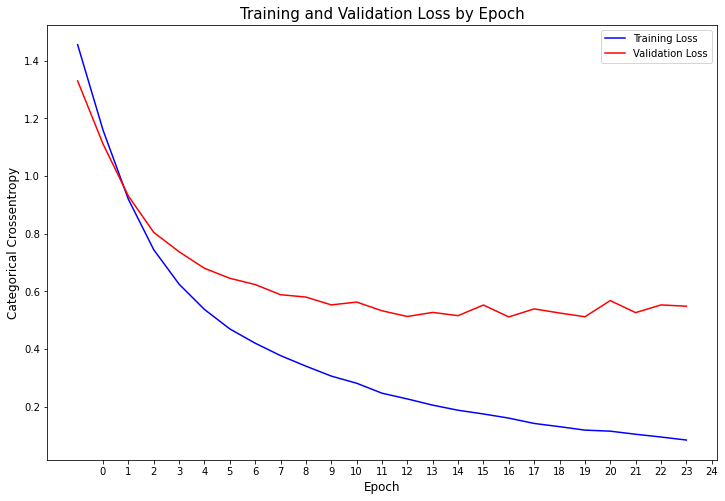

In [12]:
# The code in this cell was adapted from a lecture at General Assembly

# Check out our train loss and test loss over epochs.
train_loss = classifier.history['loss']
val_loss = classifier.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')

# Set title
plt.title('Training and Validation Loss by Epoch', fontsize = 15)
plt.xlabel('Epoch', fontsize = 12)
plt.ylabel('Categorical Crossentropy', fontsize = 12)
plt.xticks(range(1,26), range(26))

plt.legend(fontsize = 10);

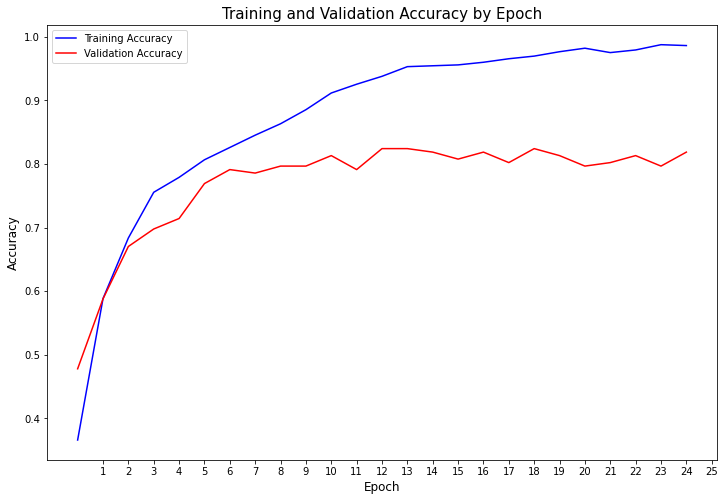

In [13]:
# The code in this cell was adapted from a lecture at General Assembly

# Check out our train accuracy and test accuracy over epochs.
train_loss = classifier.history['accuracy']
val_loss = classifier.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Accuracy', color='blue')
plt.plot(val_loss, label='Validation Accuracy', color='red')

# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 15)
plt.xlabel('Epoch', fontsize = 12)
plt.ylabel('Accuracy', fontsize = 12)
plt.xticks(range(1,26), range(1,26))

plt.legend(fontsize = 10);

## Prediction using the built model

In [14]:
#Making predictions from the cnn model
predictions = model.predict(X_test, verbose=1)

4/4 [==============================] - 0s 1ms/step


## Prediction using the confusion matrix

In [15]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [17]:
y_predictions = model.predict_classes(X_test)

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2467f8a4130>)

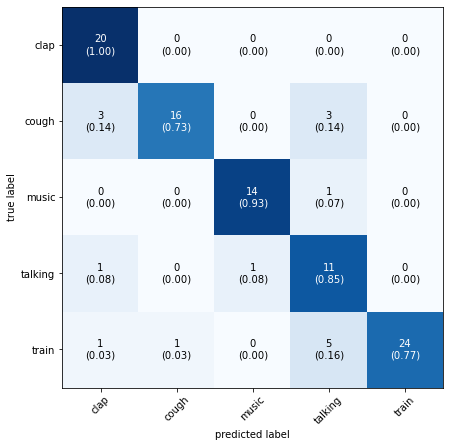

In [18]:
mat = confusion_matrix(y_test, y_predictions)
plot_confusion_matrix(conf_mat=mat, class_names=encoder.classes_, show_normed=True, figsize=(7,7))

In [19]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.7579 - accuracy: 0.8416


### The results acheved from the ANN model are quite good and it can be observed fromm the confusion matrix that the model is able to classify the audio signals exactly with not much confusion.